# 线性回归（一元和多元）

## 一元线性回归

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei'] # 使图形中的中文正常编码显示，sans-serif 表示字体中的无衬线体，SimHei是黑体
plt.rcParams['axes.unicode_minus']=False # 使坐标轴刻度表签正常显示正负号

In [3]:
path = r"C:\Users\zjc20\Downloads\python\X回归案例\data\regress_data1.csv"
# 注：这里加 r（rawstring原生字符串）是为了避免与正则表达式语法冲突
data = pd.read_csv(path)
data.head() # head()是观察前5行

,人口,收益
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [4]:
data.describe() # 查看数据的基本情况

,人口,收益
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


利用绘图函数展示样本分布情况

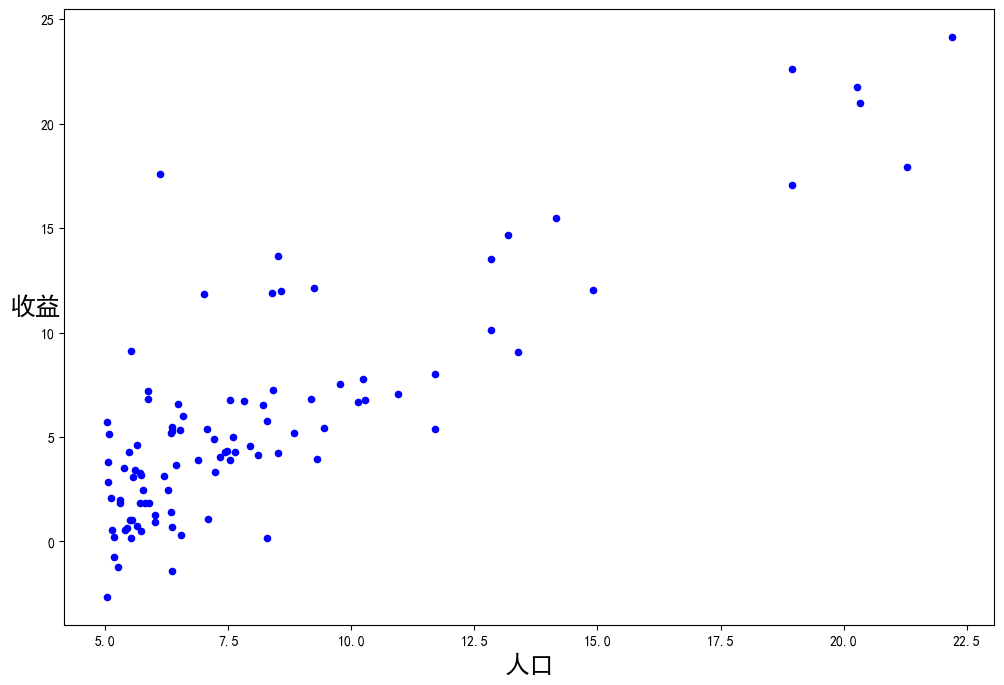

In [5]:
data.plot(kind='scatter', x='人口', y='收益', figsize=(12,8), color='blue')
plt.xlabel('人口', fontsize=18)
plt.ylabel('收益', rotation=0, fontsize=18)
plt.show()

接下来使用梯度下降法最小化代价函数，以获得最优参数，进而得到回归方程。 

首先，创建一个以参数$w$为变量的代价函数
$$J\left( w  \right)=\frac{1}{2m}\sum\limits_{i=1}^{m}{{{\left( {{h}}\left( {{x}^{(i)}} \right)-{{y}^{(i)}} \right)}^{2}}}$$
其中：\\[{{h}}\left( x \right)={{w}^{T}}X={{w }_{0}}{{x}_{0}}+{{w }_{1}}{{x}_{1}}+{{w }_{2}}{{x}_{2}}+...+{{w }_{n}}{{x}_{n}}\\] 

In [6]:
def computeCost(X, y, w):
    inner = np.power(((X * w.T) - y), 2)
    return np.sum(inner) / (2 * X.shape[0])

在数据集中添加一列，以便使用向量化的解决方案来计算代价和梯度。

In [7]:
data.insert(0, 'Ones', 1)
data

,Ones,人口,收益
0,1,6.1101,17.59200
1,1,5.5277,9.13020
2,1,8.5186,13.66200
3,1,7.0032,11.85400
4,1,5.8598,6.82330
...,...,...,...
92,1,5.8707,7.20290
93,1,5.3054,1.98690
94,1,8.2934,0.14454
95,1,13.3940,9.05510


设置训练数据 X 和目标变量值 y

In [8]:
cols = data.shape[1]
# 使用iloc函数对数据进行位置索引，从而在数据表中提取出相应的数据
X = data.iloc[:,:cols-1] # X是所有行，去掉最后一列
y = data.iloc[:,cols-1:] # y是所有行的最后一列

观察下 X (训练集) and y (目标变量)是否正确.

In [9]:
X.head()

,Ones,人口
0,1,6.1101
1,1,5.5277
2,1,8.5186
3,1,7.0032
4,1,5.8598


In [10]:
y.head()

,收益
0,17.5920
1,9.1302
2,13.6620
3,11.8540
4,6.8233


由于代价函数是应该是numpy矩阵，需要转换X和Y，同时初始化w

In [11]:
X = np.matrix(X.values)
y = np.matrix(y.values)
w = np.matrix(np.array([0,0]))

w 是一个(1,2)矩阵

In [12]:
w

matrix([[0, 0]])

检测变量维度是否合法

In [13]:
X.shape, w.shape, y.shape

((97, 2), (1, 2), (97, 1))

计算代价函数 (w初始值为0)

In [14]:
computeCost(X, y, w)

32.072733877455676

# Batch Gradient Decent（批量梯度下降）

$${{w }_{j}}:={{w }_{j}}- \alpha \frac{1}{m}\sum\limits_{i=1}^m \frac{\partial }{\partial {{w}_{j}}}J\left( w \right)$$

In [15]:
def batch_gradientDescent(X, y, w, alpha, iters):
    temp = np.matrix(np.zeros(w.shape))
    parameters = int(w.ravel().shape[1])
    cost = np.zeros(iters)

    for i in range(iters):
        error = (X * w.T) - y

        for j in range(parameters):
            term = np.multiply(error, X[:, j])
            temp[0, j] = w[0, j] - ((alpha / len(X)) * np.sum(term))

        w = temp
        cost[i] = computeCost(X, y, w)

    return w, cost

设置学习率α和最大迭代次数。

In [16]:
alpha = 0.01
iters = 1000

根据训练数据，利用梯度下降法训练模型，即求解参数w

In [17]:
w_opt, cost = batch_gradientDescent(X, y, w, alpha, iters)
w_opt

matrix([[-3.24140214,  1.1272942 ]])

最后，使用优化得到的参数计算模型的代价函数值

In [18]:
computeCost(X, y, w_opt)

4.515955503078914

绘制模型，展示数据拟合情况

In [19]:
x = np.linspace(data['人口'].min(), data['人口'].max(), 100)
f = g[0, 0] + (g[0, 1] * x)

fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(x, f, 'r', label='预测值')
ax.scatter(data['人口'], data['收益'], label='训练数据')
ax.legend(loc=2)
ax.set_xlabel('人口', fontsize=18)
ax.set_ylabel('收益', rotation=0, fontsize=18)
ax.set_title('预测收益和人口规模', fontsize=18)
plt.show()

NameError: name 'g' is not defined

绘制代价函数对迭代次数的变化趋势

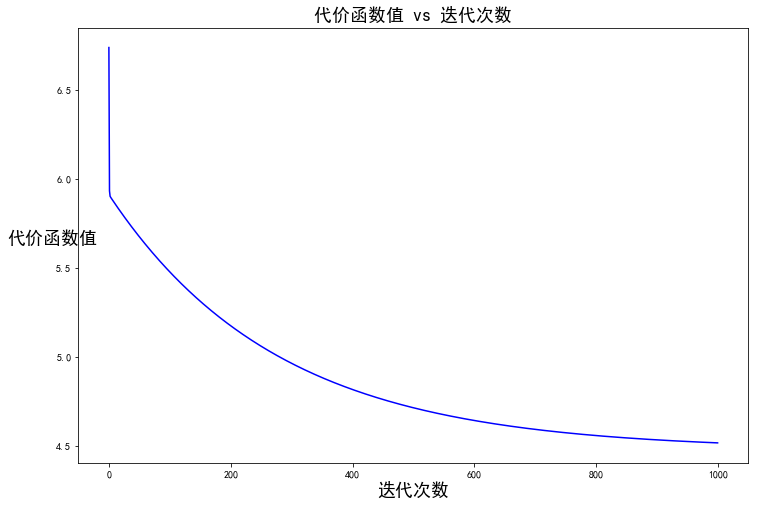

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(np.arange(iters), cost, 'b')
ax.set_xlabel('迭代次数', fontsize=18)
ax.set_ylabel('代价函数值', rotation=0, fontsize=18)
ax.set_title('代价函数值 vs 迭代次数', fontsize=18)
plt.show()

## 多元线性回归

练习还包括一个房屋价格数据集，其中有2个变量（房子的大小，卧室的数量）和目标（房子的价格）

In [ ]:
path =r'C:\Users\Administrator\Documents\MachineLearningExamples\MLcourse\linearregression\data\regress_data2.csv'
data2 = pd.read_csv(path)
data2.head()

,面积,房间数,价格
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


对于该任务，增加一个数据预处理步骤——特征归一化

In [ ]:
data2 = (data2 - data2.mean()) / data2.std()
data2.head()

,面积,房间数,价格
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


重复第1部分的步骤，并对新的数据集运行线性回归程序

In [ ]:
# add ones column
data2.insert(0, 'Ones', 1)

# set X (training data) and y (target variable)
cols = data2.shape[1]
X2 = data2.iloc[:,0:cols-1]
y2 = data2.iloc[:,cols-1:cols]

# convert to matrices and initialize theta
X2 = np.matrix(X2.values)
y2 = np.matrix(y2.values)
w2 = np.matrix(np.array([0,0,0]))

# perform linear regression on the data set
g2, cost2 = batch_gradientDescent(X2, y2, w2, alpha, iters)

# get the cost (error) of the model
computeCost(X2, y2, g2)

0.13070336960771892

查看训练进程

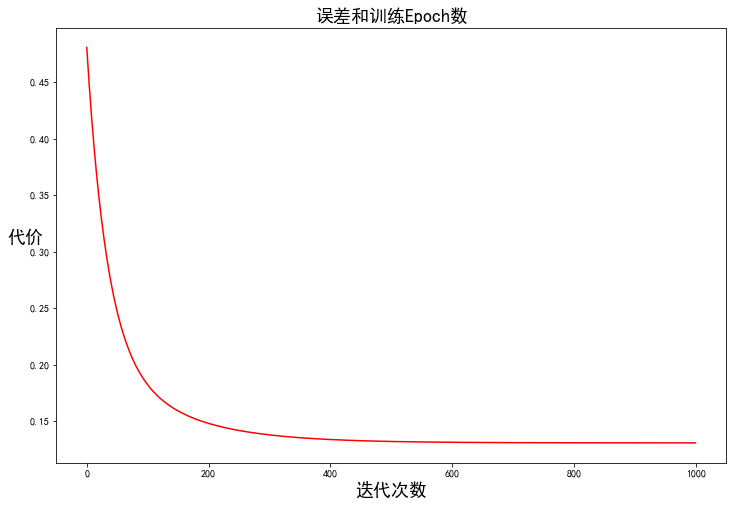

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters), cost2, 'r')
ax.set_xlabel('迭代次数', fontsize=18)
ax.set_ylabel('代价', rotation=0, fontsize=18)
ax.set_title('误差和训练Epoch数', fontsize=18)
plt.show()

### 也可以调用scikit-learn的线性回归函数，而不是从头编写算法。 
接下来，将scikit-learn中的线性回归算法应用于第1部分的数据

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

scikit-learn model的预测表现

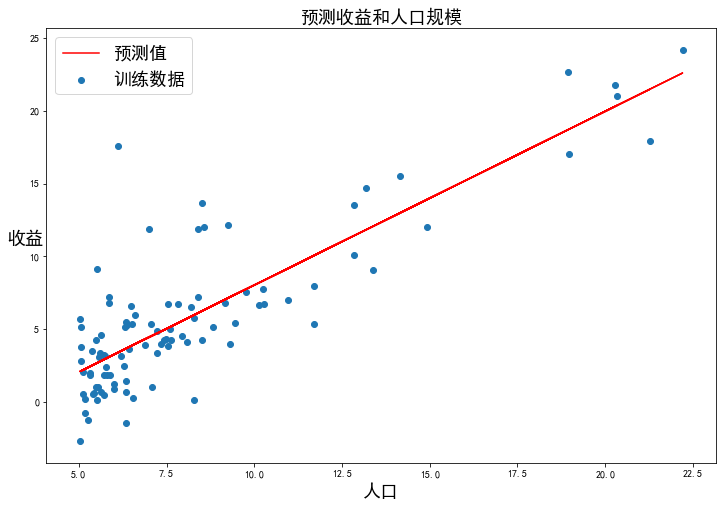

In [ ]:
x = np.array(X[:, 1].A1)
f = model.predict(X).flatten()

fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(x, f, 'r', label='预测值')
ax.scatter(data['人口'], data['收益'], label='训练数据')
ax.legend(loc=2, fontsize=18)
ax.set_xlabel('人口', fontsize=18)
ax.set_ylabel('收益', rotation=0, fontsize=18)
ax.set_title('预测收益和人口规模', fontsize=18)
plt.show()

## $L_2$正则化
$J (  { w } ) = \frac { 1 } { 2 } \sum _ { i = 1 } ^ { m } ( h _ { w} ( x ^ { ( i ) } ) - y ^ { ( i ) } ) ^ { 2 } + \lambda \sum _ { j = 1 } ^ { n } w_ { j } ^ { 2 }$，此时称作`Ridge Regression`：

In [ ]:
from sklearn.linear_model import Ridge
model = Ridge()
model.fit(X, y)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

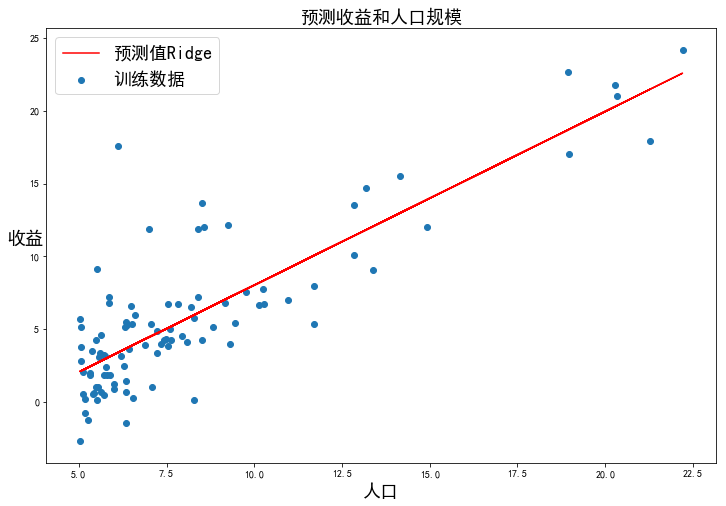

In [ ]:
x2 = np.array(X[:, 1].A1)
f2 = model.predict(X).flatten()

fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(x2, f2, 'r', label='预测值Ridge')
ax.scatter(data['人口'], data['收益'], label='训练数据')
ax.legend(loc=2, fontsize=18)
ax.set_xlabel('人口', fontsize=18)
ax.set_ylabel('收益', rotation=0, fontsize=18)
ax.set_title('预测收益和人口规模', fontsize=18)
plt.show()

## $L_1$正则化：
$J (  {w } ) = \frac { 1 } { 2 } \sum _ { i = 1 } ^ { m } ( h _ { w} ( x ^ { ( i ) } ) - y ^ { ( i ) } ) ^ { 2 } + \lambda \sum _ { j = 1 } ^ { n } | w _ { j } |$，此时称作`Lasso Regression` 

In [ ]:
from sklearn.linear_model import Lasso
model = Lasso()
model.fit(X, y)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

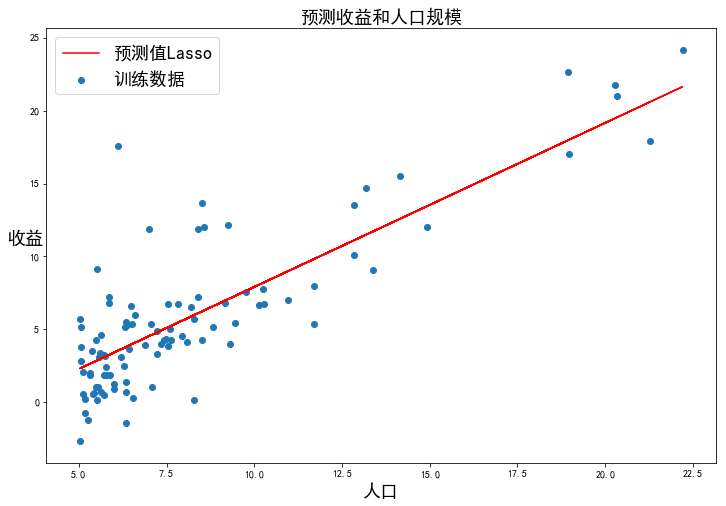

In [ ]:
x3= np.array(X[:, 1].A1)
f3 = model.predict(X).flatten()

fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(x3, f3, 'r', label='预测值Lasso')
ax.scatter(data['人口'], data['收益'], label='训练数据')
ax.legend(loc=2, fontsize=18)
ax.set_xlabel('人口', fontsize=18)
ax.set_ylabel('收益', rotation=0, fontsize=18)
ax.set_title('预测收益和人口规模', fontsize=18)
plt.show()

## 最小二乘法(LSM)：

最小二乘法的需要求解最优参数$w^{*}$：

已知：目标函数

$J\left( w  \right)=\frac{1}{2m}\sum\limits_{i=1}^{m}{{{\left( {h}\left( {x^{(i)}} \right)-{y^{(i)}} \right)}^{2}}}$

其中：${h}\left( x \right)={w^{T}}X={w_{0}}{x_{0}}+{w_{1}}{x_{1}}+{w_{2}}{x_{2}}+...+{w_{n}}{x_{n}}$

将向量表达形式转为矩阵表达形式，则有$J(w )=\frac{1}{2}{{\left( Xw -y\right)}^{2}}$ ，其中$X$为$m$行$n+1$列的矩阵（$m$为样本个数，$n$为特征个数），$w$为$n+1$行1列的矩阵(包含了$w_0$)，$y$为$m$行1列的矩阵，则可以求得最优参数$w^{*} ={{\left( {X^{T}}X \right)}^{-1}}{X^{T}}y$ 

In [ ]:
def LSM(X, y):
    w = np.linalg.inv(X.T@X)@X.T@y #np.linalg.inv()：矩阵求逆，X.T@X等价于X.T.dot(X)
    return w

In [ ]:
final_w2=LSM(X, y)
final_w2

matrix([[-3.89578088],
        [ 1.19303364]])

#### 梯度下降与最小二乘法的比较：
梯度下降得到的结果是matrix([[-3.24140214,  1.1272942 ]])

梯度下降：需要选择学习率$\alpha$，需要多次迭代，当特征数量$n$大时也能较好适用，适用于各种类型的模型

最小二乘法：不需要选择学习率$\alpha$，一次计算得出，需要计算${{\left( {{X}^{T}}X \right)}^{-1}}$，如果特征数量$n$较大则运算代价大，因为矩阵逆的计算时间复杂度为$O(n^3)$，通常来说当$n$小于10000 时还是可以接受的